### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
data['age'].replace({'50plus':'50', 'below21':'21'}, inplace=True )
data['age'] = data['age'].astype('int64')

C:\Users\mrbed\AppData\Local\Temp\ipykernel_38348\3671377885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].replace({'50plus':'50', 'below21':'21'}, inplace=True )


4. What proportion of the total observations chose to accept the coupon?



In [13]:
data['Y'].value_counts(normalize=True)*100

Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

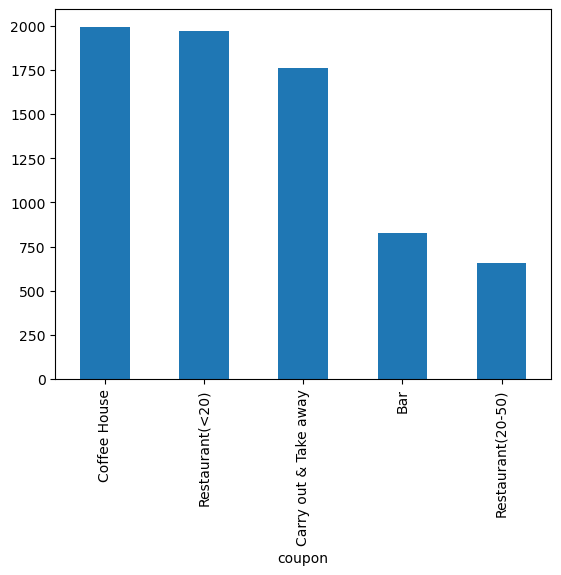

In [15]:
coupon_data = data[data['Y']==1]['coupon'].value_counts()
coupon_data.plot(kind='bar')

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

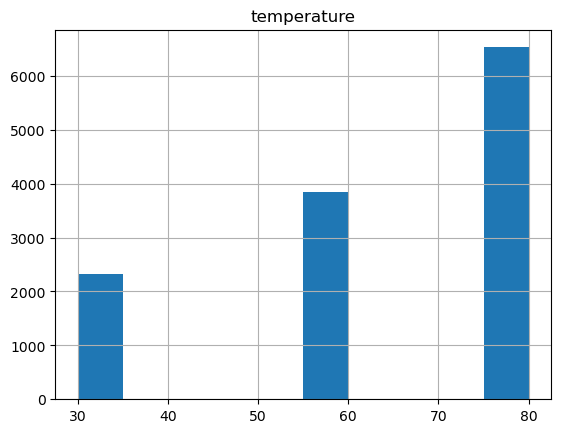

In [17]:
data.hist(column='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
onlybardata = data.query("coupon == 'Coffee House'")
onlybardata

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [21]:
onlybardata['Y'].value_counts()

Y
0    2001
1    1995
Name: count, dtype: int64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar3
less3    1728
more3     245
Name: count, dtype: int64


C:\Users\mrbed\AppData\Local\Temp\ipykernel_38348\1036366555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlybardata['Bar3'] = onlybardata['Bar'].replace({'1~3' : 'less3', 'less1' : 'less3',  'never' : 'less3', '4~8' : 'more3',  'gt8' : 'more3'})


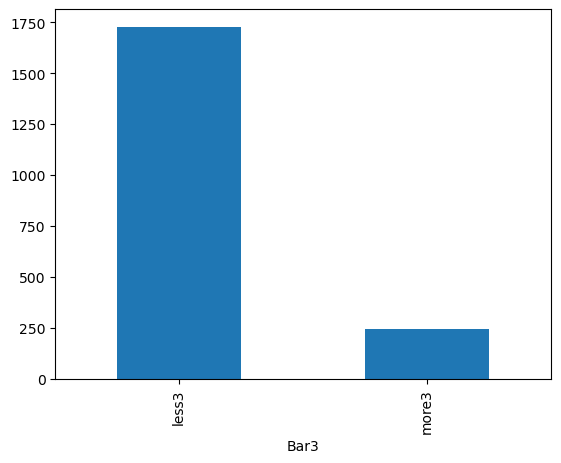

In [23]:
onlybardata['Bar3'] = onlybardata['Bar'].replace({'1~3' : 'less3', 'less1' : 'less3',  'never' : 'less3', '4~8' : 'more3',  'gt8' : 'more3'})

coupon_databar = onlybardata[onlybardata['Y']==1]['Bar3'].value_counts()
coupon_databar.plot(kind='bar')
print(coupon_databar)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


C:\Users\mrbed\AppData\Local\Temp\ipykernel_38348\2184777930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlybardata['Bar1'] = onlybardata['Bar'].replace({'1~3' : 'more1', 'less1' : 'less1',  'never' : 'less1', '4~8' : 'more1',  'gt8' : 'more1'})


Bar1
less1    973
more1    432
Name: count, dtype: int64
No Diffreance



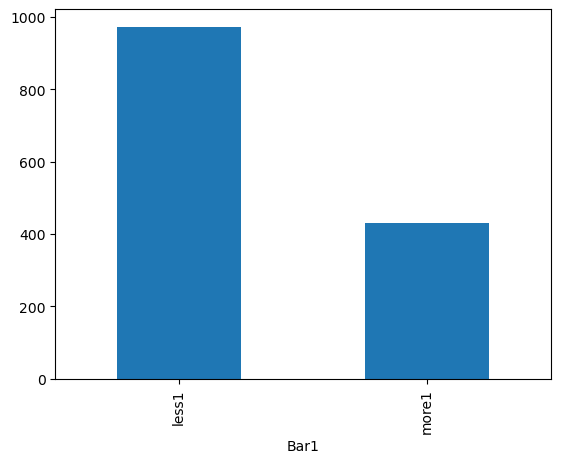

In [25]:
onlybardata['Bar1'] = onlybardata['Bar'].replace({'1~3' : 'more1', 'less1' : 'less1',  'never' : 'less1', '4~8' : 'more1',  'gt8' : 'more1'})
data25 = onlybardata.query('age>25')
coupon_data25 = data25[(data25['Y']==1) ]['Bar1'].value_counts()
coupon_data25.plot(kind='bar')
print(coupon_data25)

print('No Diffreance\n')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Bar1
less1    1264
more1     607
Name: count, dtype: int64
No Diffreance



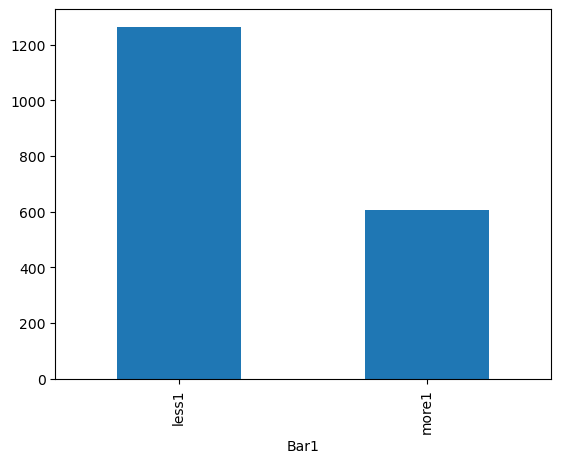

In [27]:
datakid = onlybardata.query("occupation!='Farming Fishing & Forestry' and passanger!='Kid(s)'")
coupon_datakid = datakid[(datakid['Y']==1)]['Bar1'].value_counts()
coupon_datakid.plot(kind='bar')
print(coupon_datakid)
print('No Diffreance\n')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



No Diffreance had passengers that were not a kid, and were not widowed



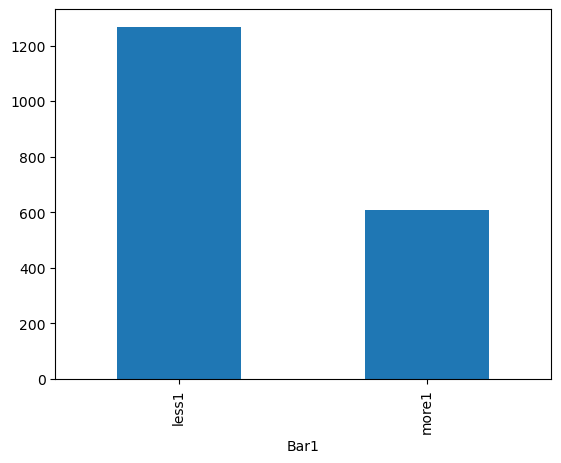

In [29]:
m = onlybardata.query('maritalStatus!="Widowed"' and 'passanger!="Kid(s)"')
coupon_m = m[(m['Y']==1)]['Bar1'].value_counts()
coupon_m.plot(kind='bar')
coupon_m

print('No Diffreance had passengers that were not a kid, and were not widowed\n')

more  copuon use who go to bars more than once a month and are under the age of 30



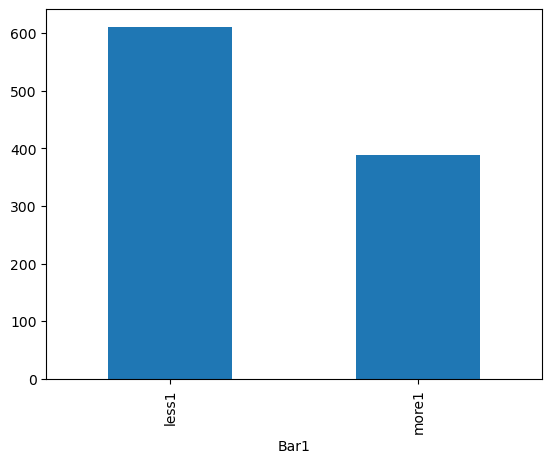

In [30]:
data30 = onlybardata.query('age<30')
coupon_data30 = data30[(data30['Y']==1) ]['Bar1'].value_counts()
coupon_data30.plot(kind='bar')
coupon_data30
print('more  copuon use who go to bars more than once a month and are under the age of 30\n')

People with lower income, who go to bar more than once, use more coupons


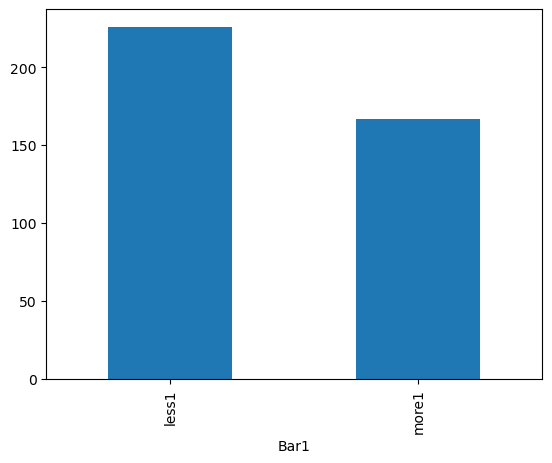

In [31]:
cheapres = onlybardata.query("RestaurantLessThan20  in ['4~8', 'gt8'] and income in ['$37500 - $49999' , '$25000 - $37499',  '$12500 - $24999',  'Less than $12500']")

coupon_cheapres = cheapres[(cheapres['Y']==1) ]['Bar1'].value_counts()
coupon_cheapres.plot(kind='bar')
coupon_cheapres
print('People with lower income, who go to bar more than once, use more coupons')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [33]:
print('people who go to the bar 1 to 3 times a month and are in lower income bracket, most often use coupon.' )

people who go to the bar 1 to 3 times a month and are in lower income bracket, most often use coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Will a Customer Accept the Coupon?

Customers come in various types—single, married, with kids, and belonging to different age groups, income levels, and professions. Additionally, their habits, such as how often they eat out or visit bars, influence their coupon usage.

Let’s first examine which types of customers use coupons more frequently and the kinds of coupons they prefer

### By Age and Income:

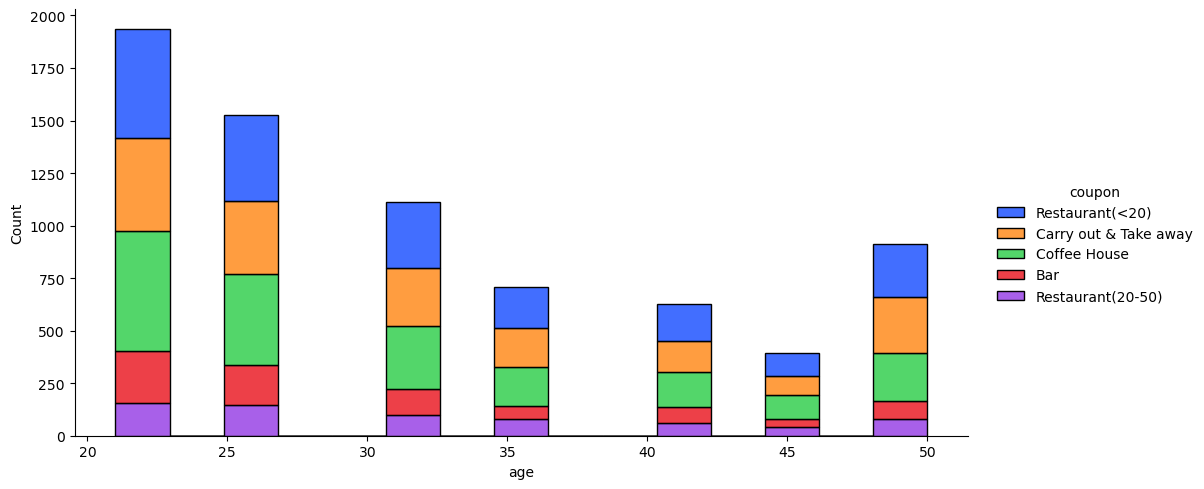

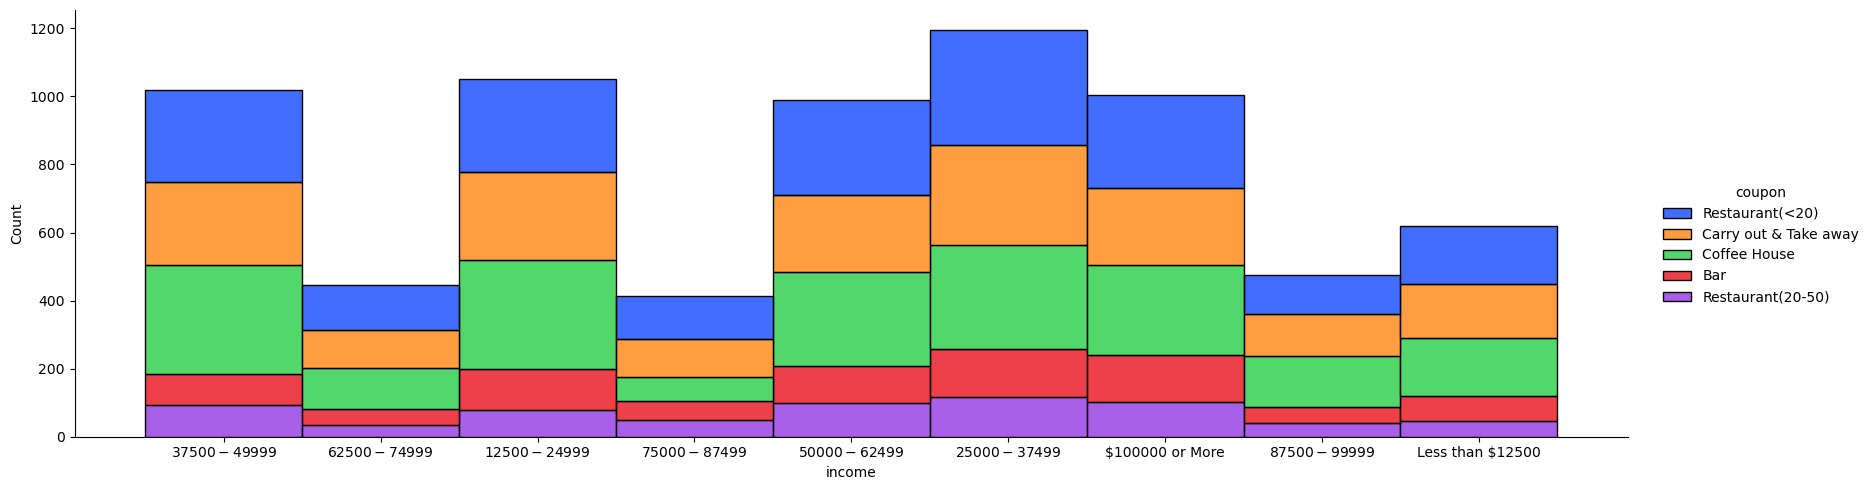

In [36]:
sns.displot(data.query('Y==1'), x='age', hue = 'coupon', palette="bright", height=5, aspect=10/5, multiple="stack")
plt.savefig("images/ByAge.png")
sns.displot(data.query('Y==1'), x='income', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/ByIncome.png")

This graph shows that the younger population is more likely to use coupons for coffee, carryout, and inexpensive restaurants. Coupon usage in bars is low, and overall, every age group uses coupons for more expensive restaurants minimally. Coupon usage decreases proportionally with age. Interestingly, individuals over 50 use coupons at a rate similar to their 30-year-old counterparts.

This graph also shows that individuals with a middle income range of $25K to $62K are more likely to use coupons. This trend aligns with the age group preferences for coffee, carryout, and inexpensive restaurants. Coupon usage in bars is low, and overall, every income group minimally uses coupons for more expensive restaurants. Coupon usage decreases proportionally with income. Interestingly, individuals earning over $100K use coupons at a rate similar to those in the middle-income range.

### Now let's see if Gender, Kids or Marital staus makes a diffrence. 

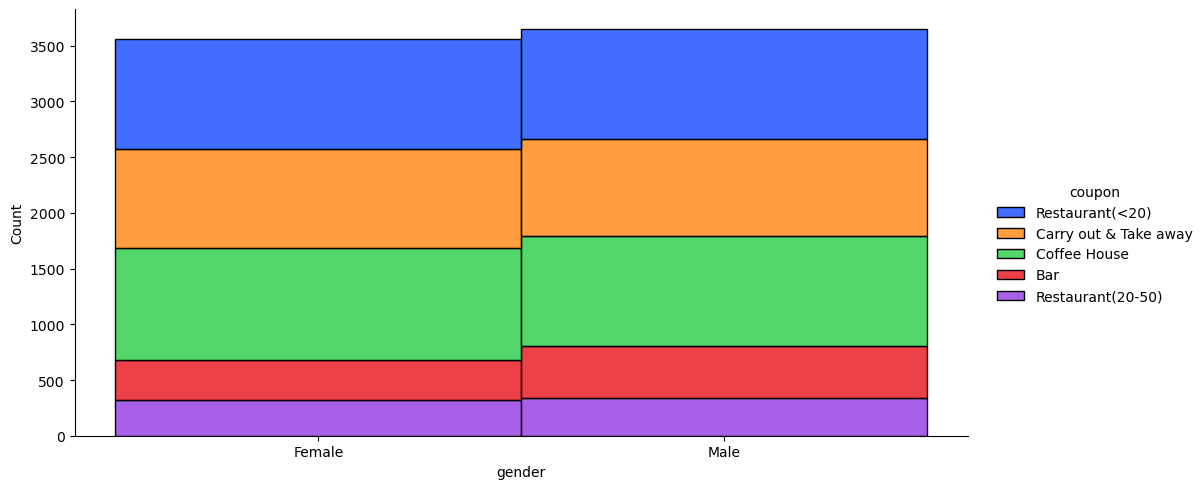

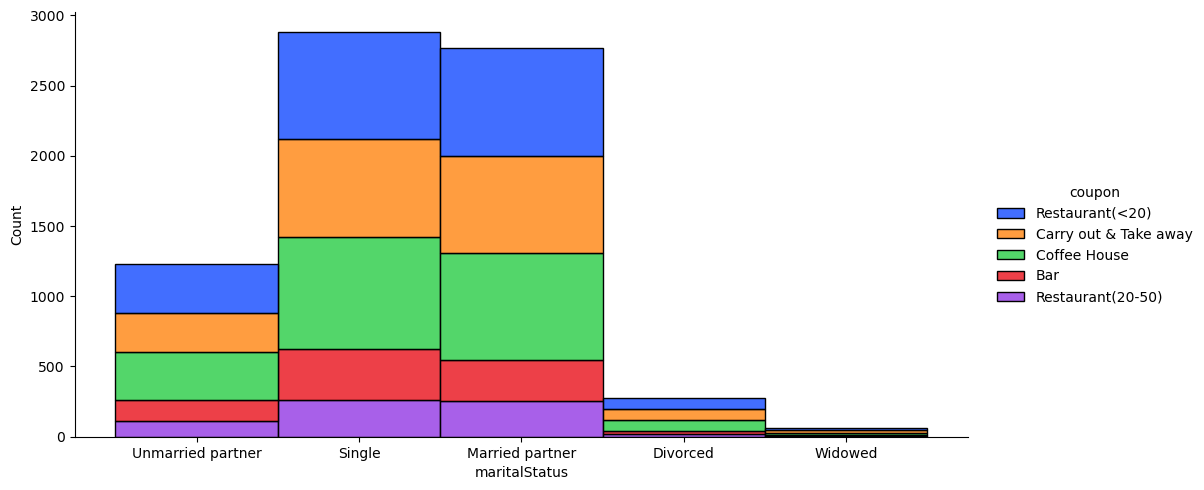

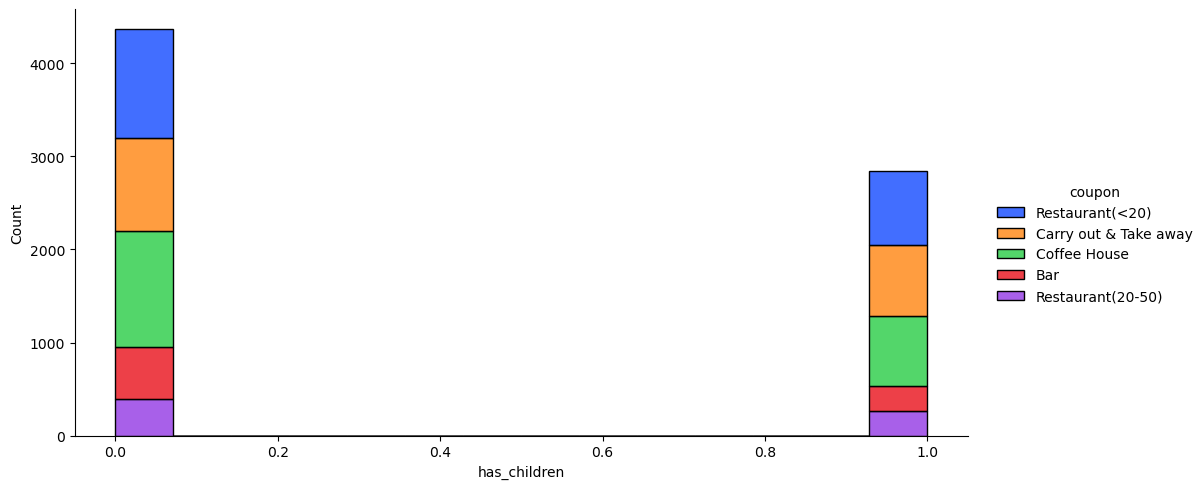

In [38]:
sns.displot(data.query('Y==1'), x='gender', hue = 'coupon', palette="bright", height=5, aspect=10/5, multiple="stack")
plt.savefig("images/ByGender.png")
sns.displot(data.query('Y==1'), x='maritalStatus', hue = 'coupon', palette="bright", height=5, aspect=10/5, multiple="stack")
plt.savefig("images/BymaritalStatus.png")
sns.displot(data.query('Y==1'), x='has_children', hue = 'coupon', palette="bright", height=5, aspect=10/5, multiple="stack")
plt.savefig("images/Byhas_children.png")

No major difference between genders, but Marital staus of Single and Married couples use more coupons so as people with no kids.  

### Now let see how educaiton and profession affect coupon use:

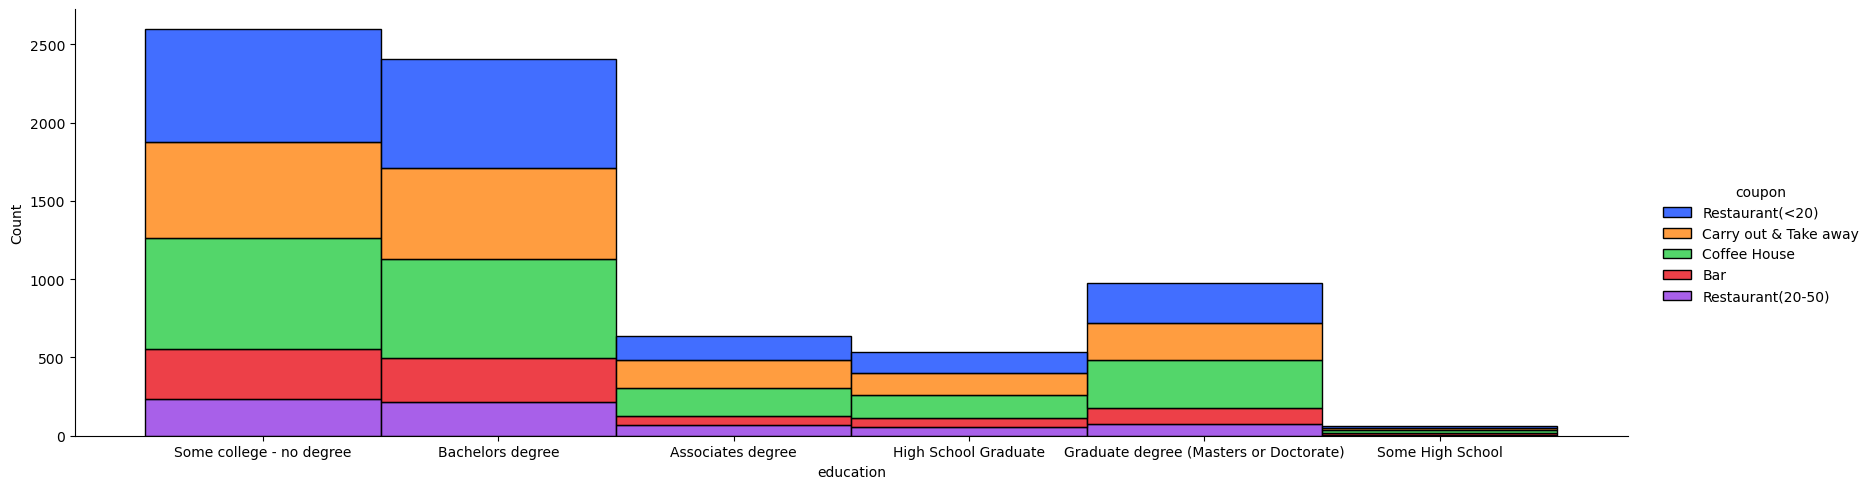

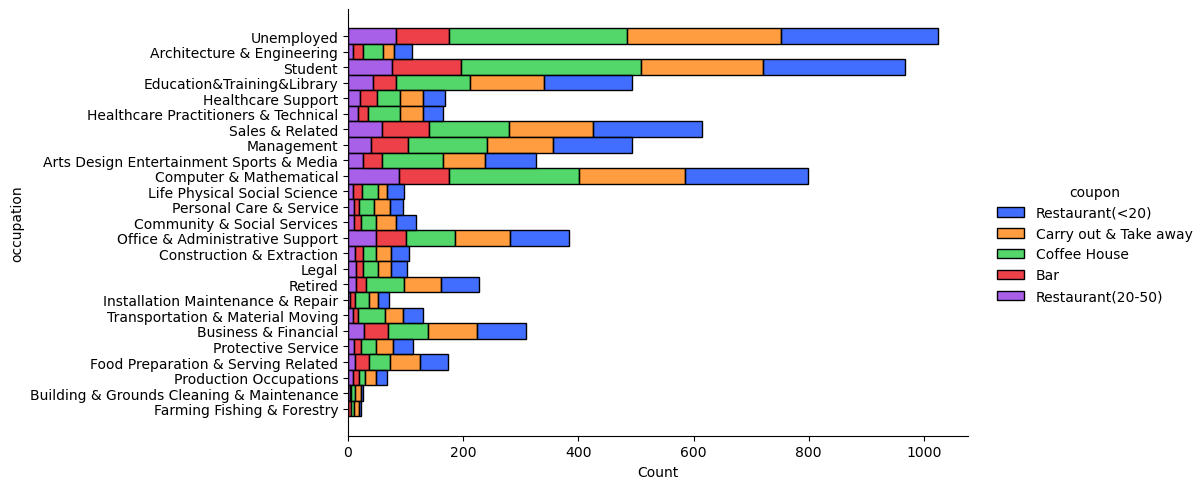

In [40]:
sns.displot(data.query('Y==1'), x='education', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/Byeducation.png")
sns.displot(data.query('Y==1'), y='occupation', hue = 'coupon', palette="bright", height=5, aspect=10/5, multiple="stack")
plt.savefig("images/Byoccupation.png")

This is very interesting, is it that the Unemployed and students have more time to take the survey? in any case they are the one's using the coupons the most. Also people with some college education (including Bachelor's and Master's degrees) are more likely to use a coupon.

### Now let see what is the affect of Contextual attributes

Form the graphs, it is clear that person will most likely use a coupon when it is Sunny, warmer weather, going to a non-urgent place along or with friends. Evening and coupons with one-day validity will be more than like be used.  

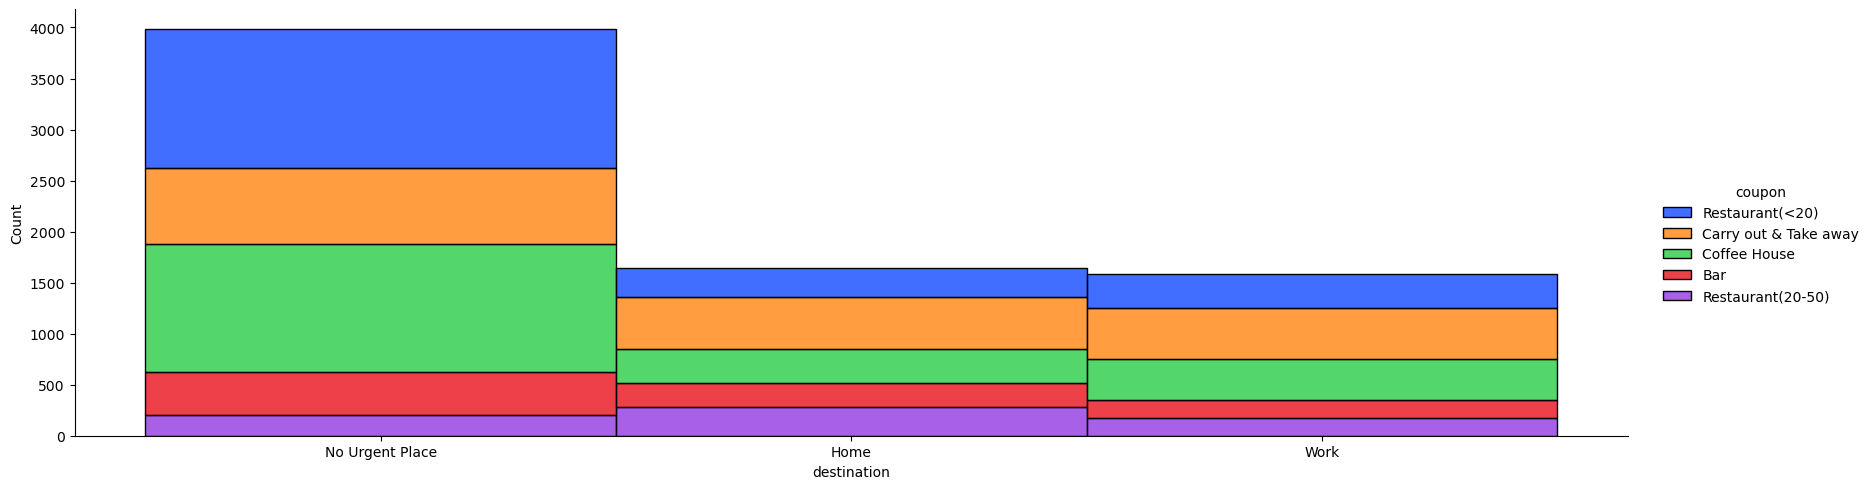

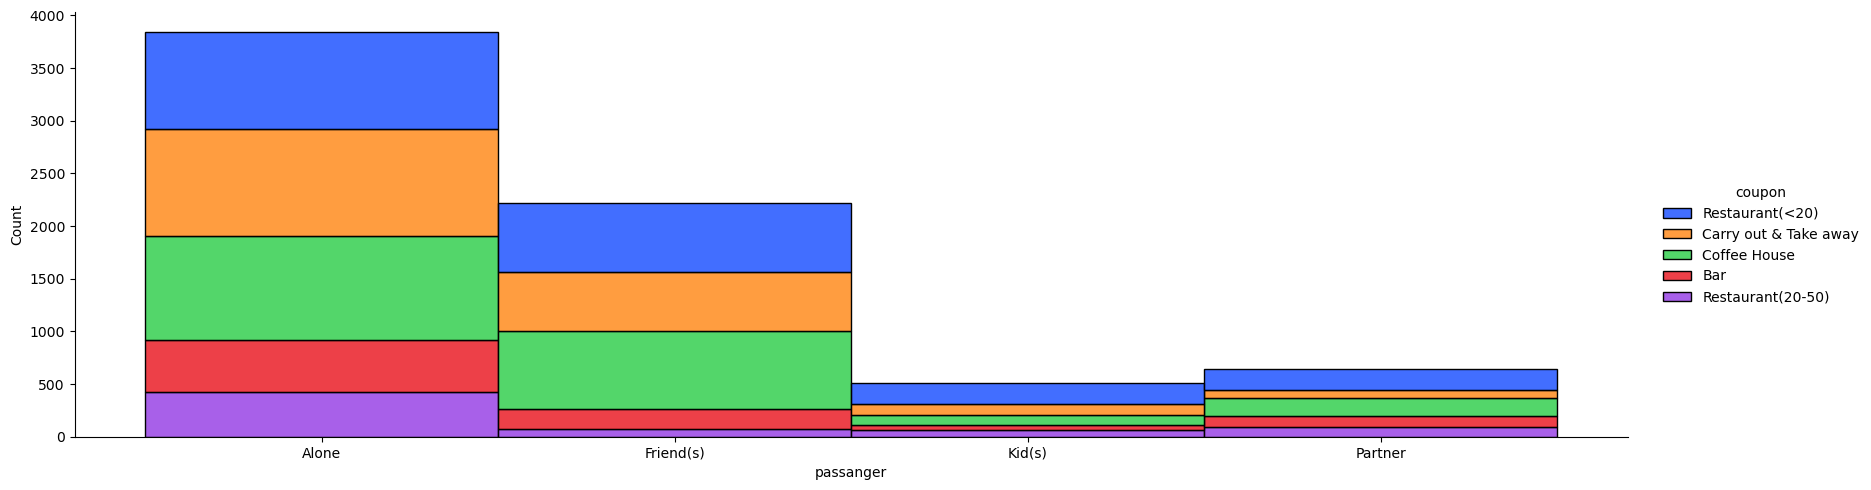

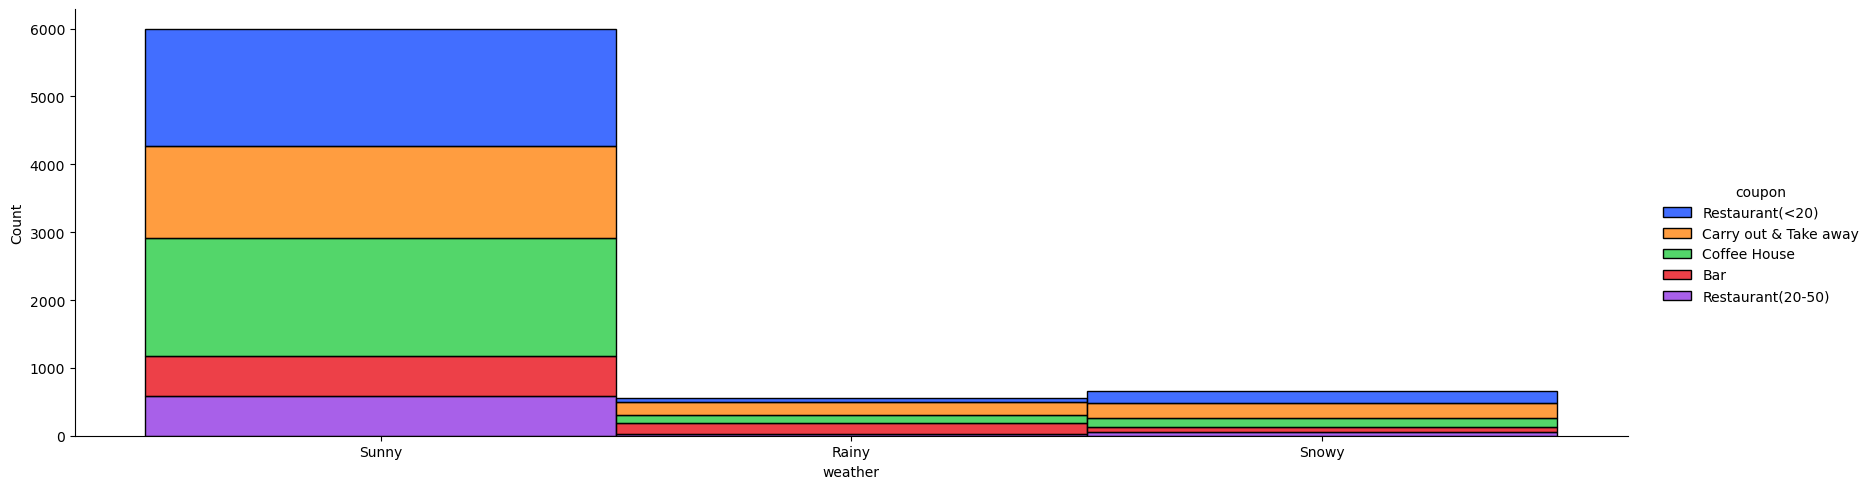

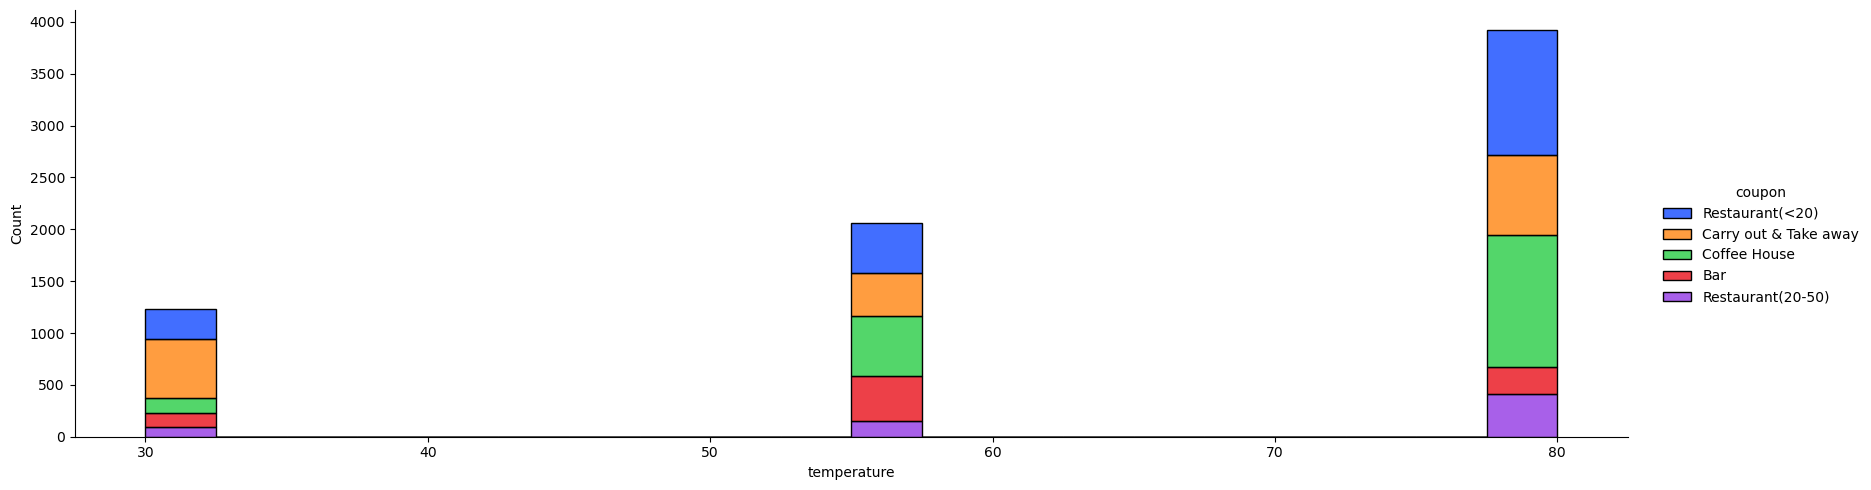

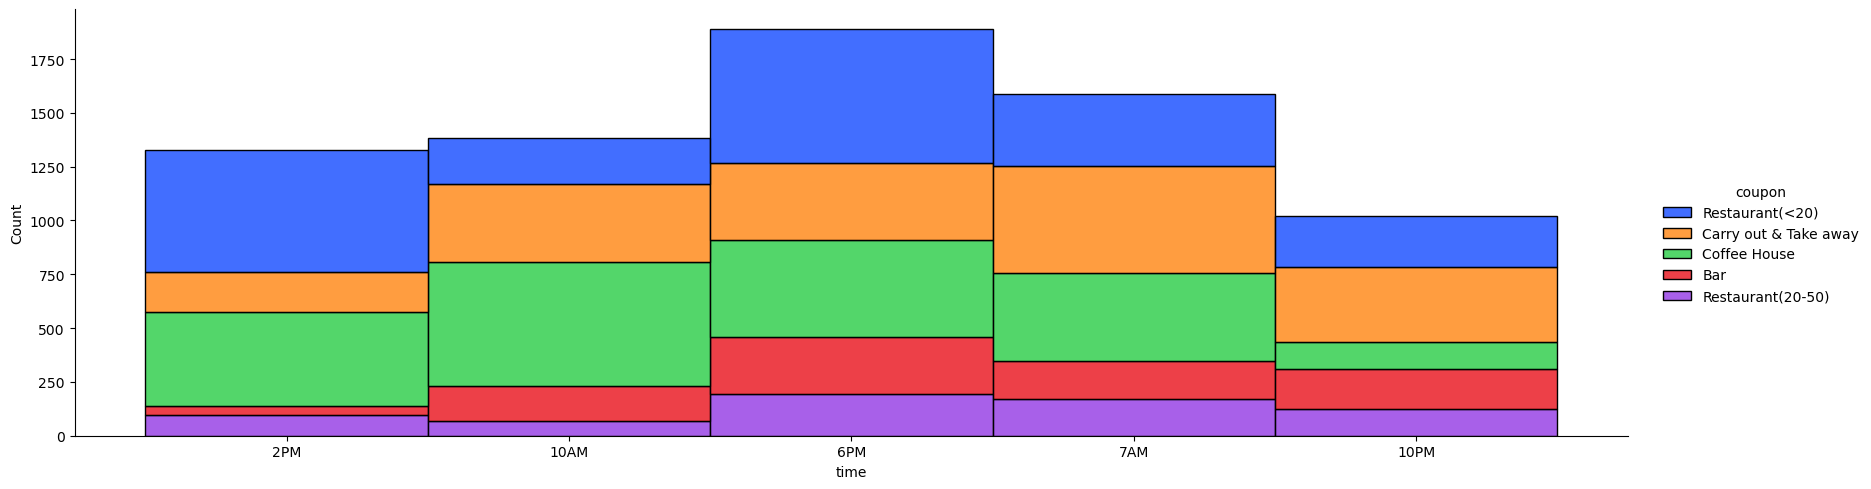

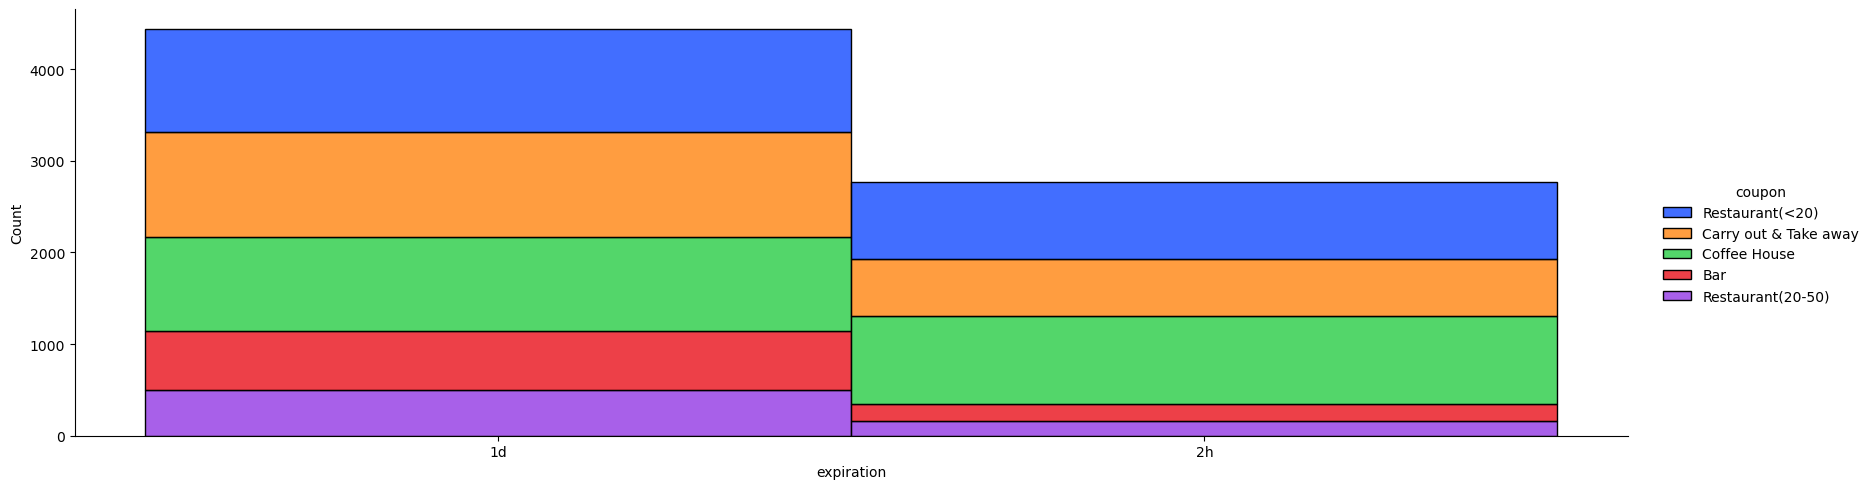

In [43]:
sns.displot(data.query('Y==1'), x='destination', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/destination.png")
sns.displot(data.query('Y==1'), x='passanger', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/passanger.png")
sns.displot(data.query('Y==1'), x='weather', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/weather.png")
sns.displot(data.query('Y==1'), x='temperature', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/temperature.png")
sns.displot(data.query('Y==1'), x='time', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/time.png")
sns.displot(data.query('Y==1'), x='expiration', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/expiration.png")

### Now let see what is the affect of number of time a service is used by the costomer

Overall we see a tendancy that a person who goes to a place more offen uses less coupons. Still most coupons are used at coffee house. People who go 1 to 3 times to any place used most coupons expect the high end resturant, where only first timer uses the most coupons.  

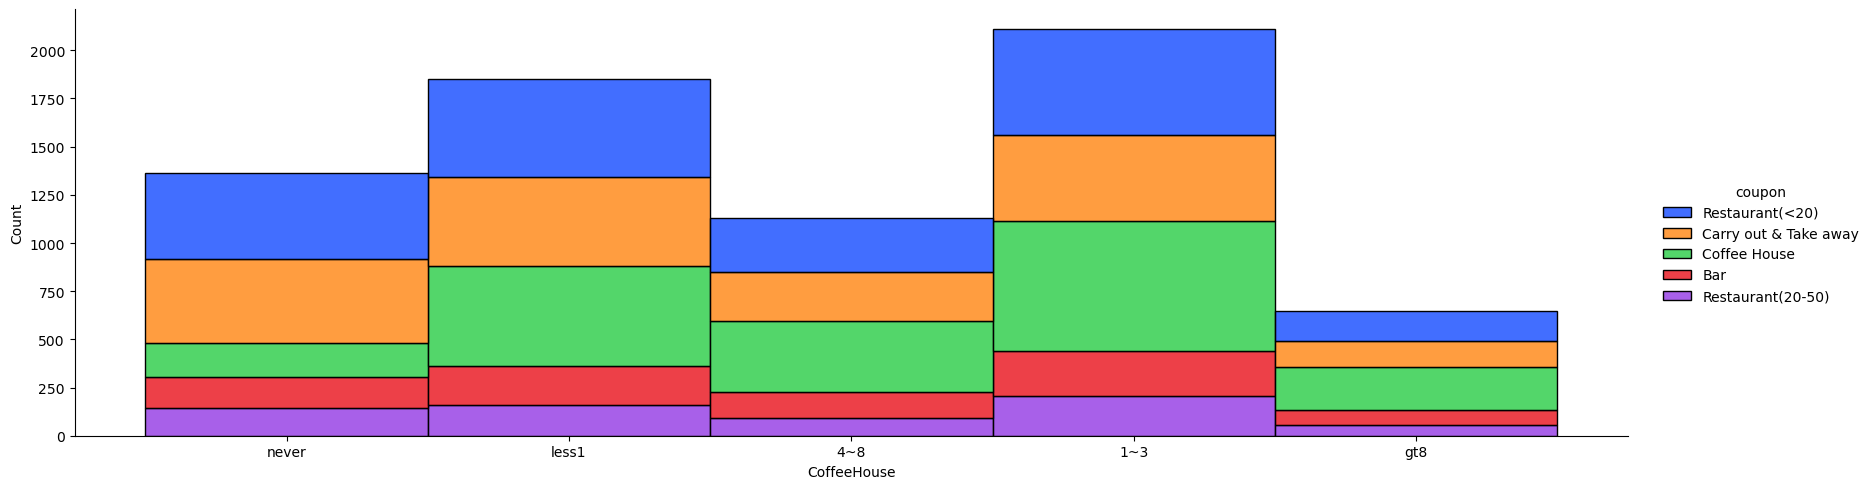

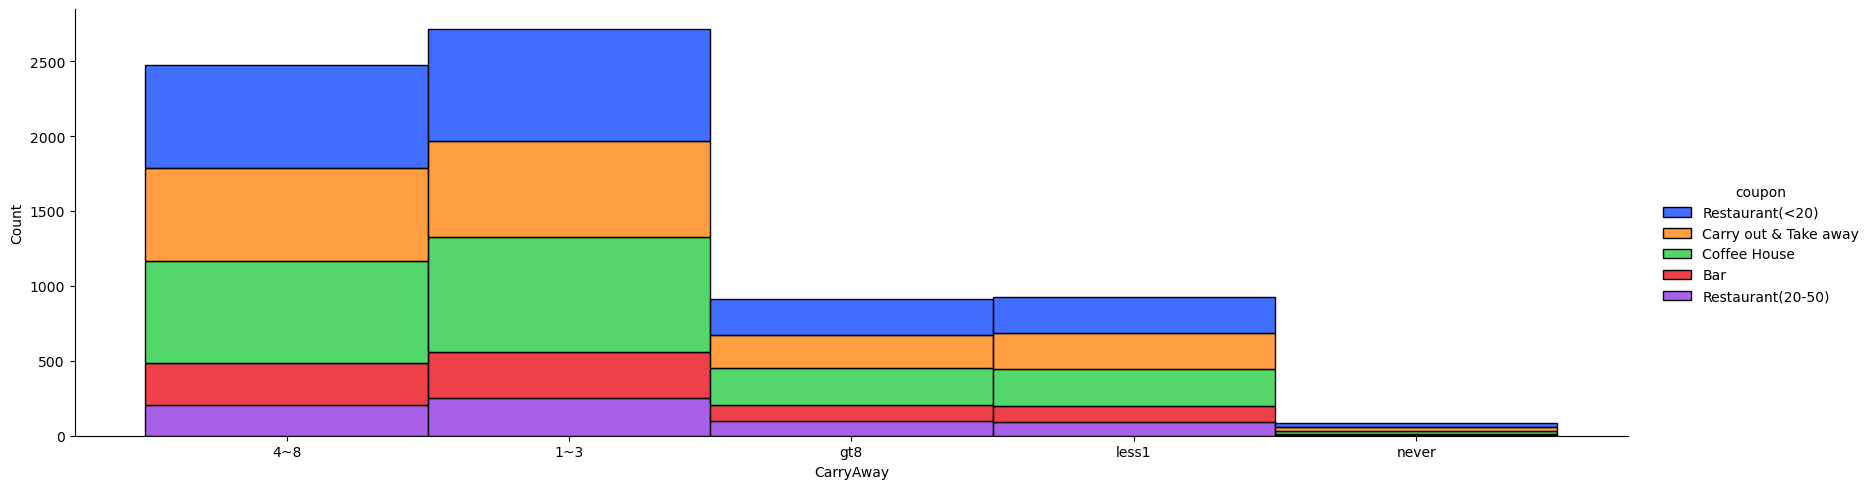

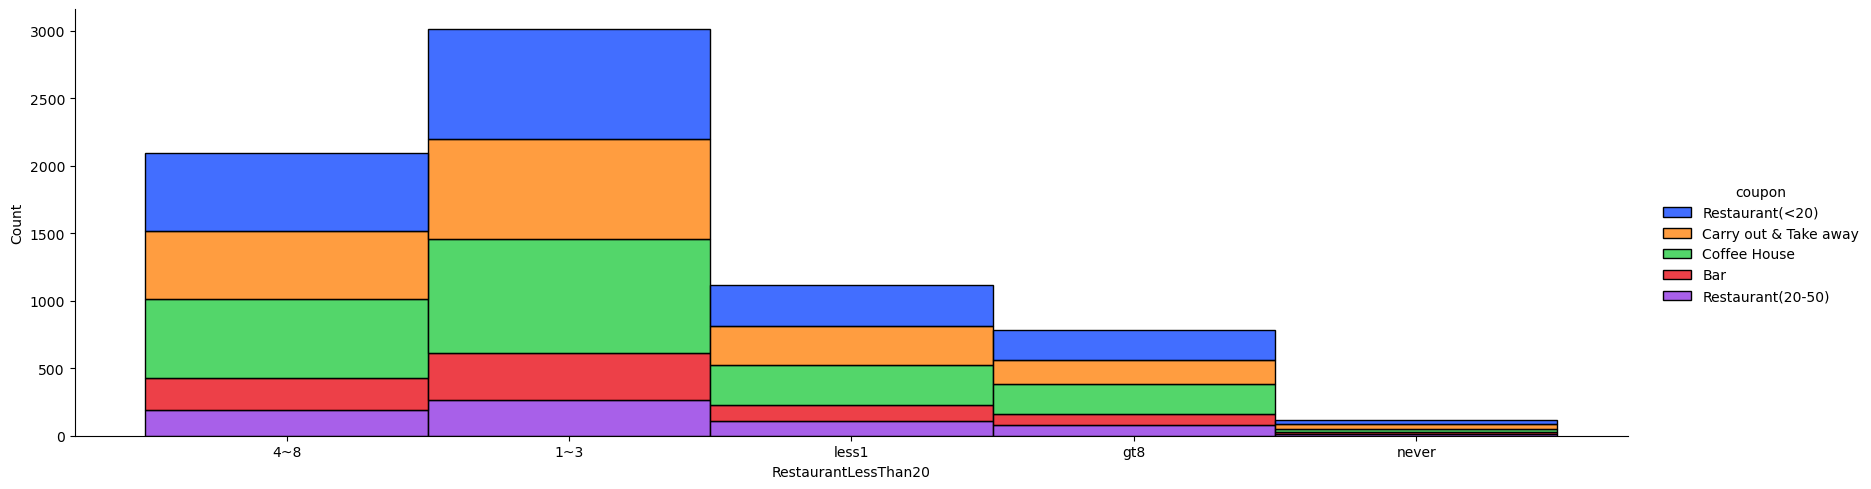

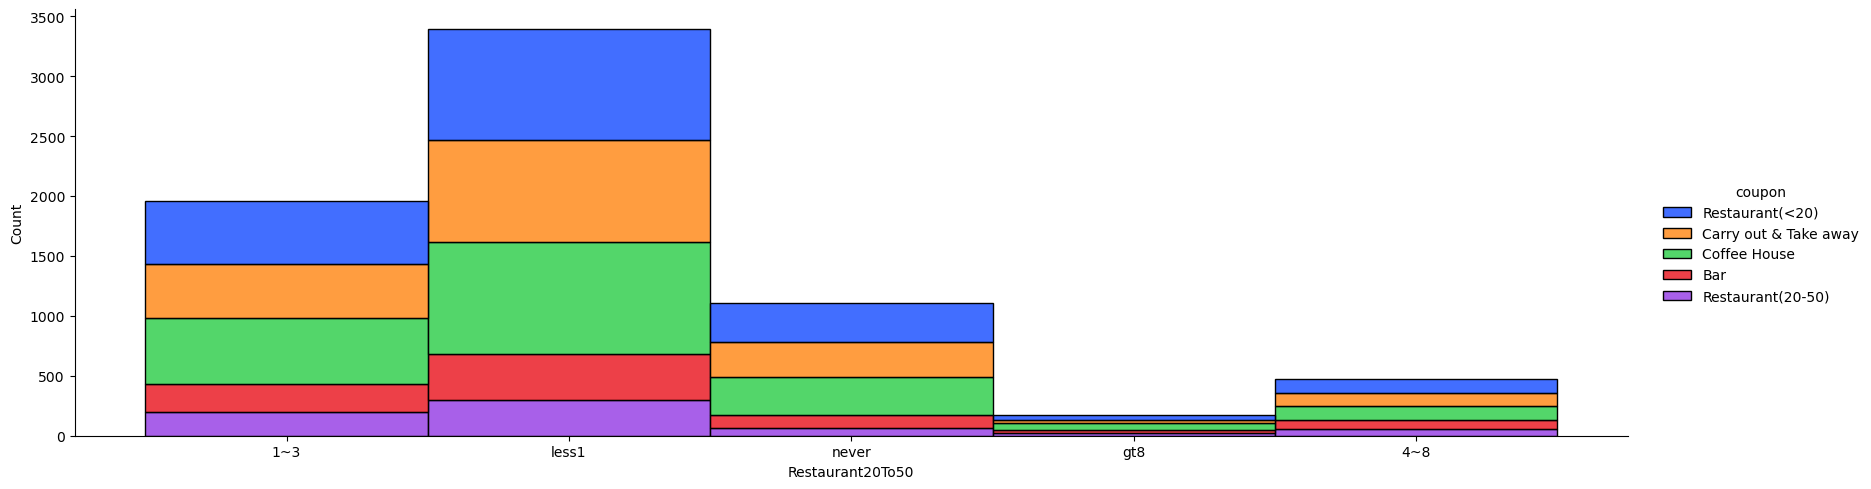

In [45]:
sns.displot(data.query('Y==1'), x='CoffeeHouse', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/CoffeeHouse.png")
sns.displot(data.query('Y==1'), x='CarryAway', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/CarryAway.png")
sns.displot(data.query('Y==1'), x='RestaurantLessThan20', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/RestaurantLessThan20.png")
sns.displot(data.query('Y==1'), x='Restaurant20To50', hue = 'coupon', palette="bright", height=5, aspect=10/3, multiple="stack")
plt.savefig("images/Restaurant20To50.png")
